### Stochastic Soaring Raptor Simulator (SSRS)
https://github.com/NREL/SSRS
- Easy to use tool for predicting conflict between likely golden eagle routes and operational/planned wind turbines
- Simulates a large number of golden eagle tracks from a given location/region under given wind conditions
- Applicable to any region in the continental US (Only uses publicly available data)
- Captures uncertainty in atmospheric conditions, eagle decision-making, and starting/entry location

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from dataclasses import replace, asdict
from ssrs import Terrain, Simulator, Config, WTK

## Uniform mode


---- SSRS in uniform mode
Run name: run_wy
Output dir: /Users/rsandhu/eagle_project/SSRS/notebooks/output/run_wy
Terrain: Bounds set to [-106.28, 42.78, -105.43, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
Computing orographic updrafts..
s10d270_0: Found saved potential
s10d270_0: Simulating 1000 tracks..took 21 sec
Plotting simulated_tracks..
Plotting presence map for the study area..
Number of projects: 9
Number of turbines: 416
Hub height (min,median,max): 80.0, 80.0, 89.0
Rotor Dia (min,median,max): 77.0, 91.0, 127.0
    Project                   State Year  Count Hub_Hght  Rotor_Dia 
1.  Cedar Springs II          WY    2020  3     89.0      127.0     
2.  Cedar Springs III         WY    2020  46    89.0      127.0     
3.  Cedar Springs I           WY    2020  24    89.0      127.0     
4.  Top of the World          WY    20

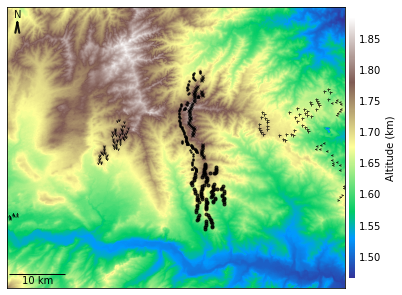

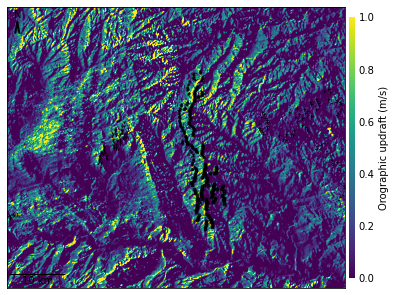

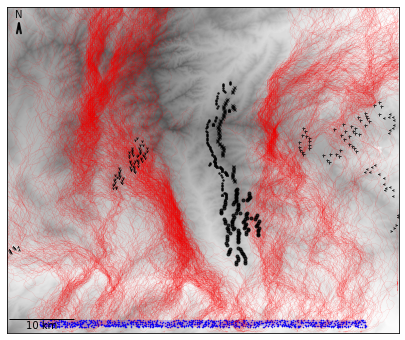

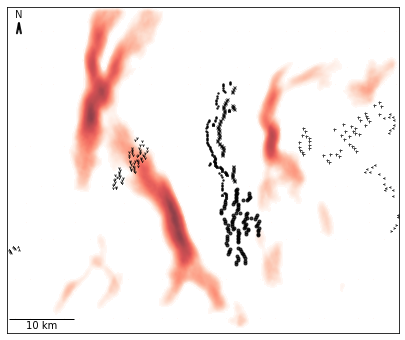

In [3]:
# Uniform mode
config_wy_uniform = Config(
    # terrain parameters
    run_name='run_wy',
    southwest_lonlat=(-106.21, 42.78), 
    region_width_km=(60., 50.),
    resolution=100.,
    # simulation parameters
    sim_mode='uniform',
    uniform_winddirn=270.,
    uniform_windspeed=10.,
    track_direction=0.,
    track_count = 1000,
    track_start_region=(5, 55, 1, 2)
)
sim = Simulator(config_wy_uniform)
sim.simulate_tracks()
sim.plot_terrain_elevation(show=True)
sim.plot_simulation_output(show=True)
sim.turbines.print_details()

## Snapshot mode


---- SSRS in snapshot mode
Run name: run_wy
Output dir: /Users/rsandhu/eagle_project/SSRS/notebooks/output/run_wy
Terrain: Bounds set to [-106.28, 42.78, -105.43, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
Considering WindToolKit source: AWS
WTK: Downloading following layers:
winddirection_100m
temperature_100m
pressure_100m
windspeed_100m
WTK: Downloading data for 03 PM, 01 Dec 2014
Computing orographic updrafts..took 9 sec
y2014m12d01h15_0: Found saved potential
y2014m12d01h15_0: Simulating 1000 tracks..took 21 sec
Plotting simulated_tracks..
Plotting presence map for the study area..
Number of projects: 9
Number of turbines: 416
Hub height (min,median,max): 80.0, 80.0, 89.0
Rotor Dia (min,median,max): 77.0, 91.0, 127.0
    Project                   State Year  Count Hub_Hght  Rotor_Dia 
1.  Cedar Springs II          WY    202

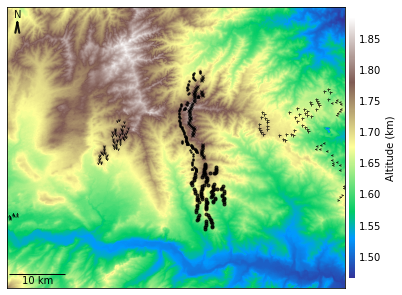

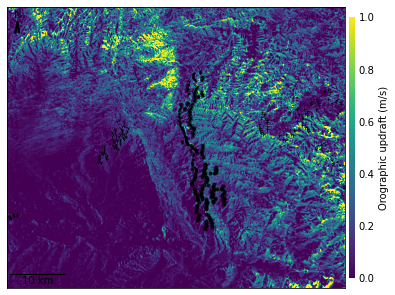

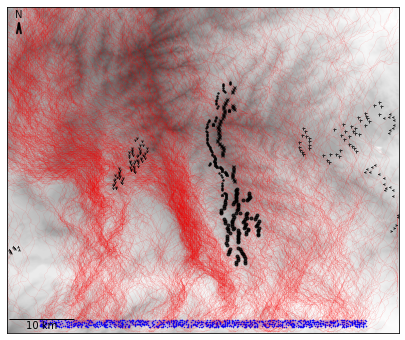

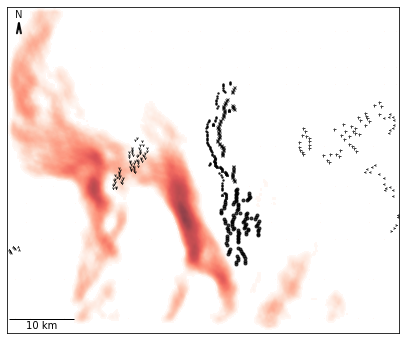

In [4]:
config_wy_snapshot = replace(
    config_wy_uniform,
    sim_mode='snapshot',
    snapshot_datetime=(2014, 12, 1, 15),
    track_direction=0.,
)
sim = Simulator(config_wy_snapshot)
sim.simulate_tracks()
sim.plot_terrain_elevation(show=True)
sim.plot_simulation_output(show=True)
sim.turbines.print_details()